# Lending Club Loan Analysis

GA Data Science Immersive Capstone Project

Samir A. Poonawala

Friday, February 3, 2017

### Lending Club Overview
* Lending Club is the world's largest online credit marketplace
* The Company underwrites, prices, and services personal and business loans as well as provides financing for elective medical procedures
* Loans are funded by investors who assume the associated credit risk
    * Unlike a traditional bank, LC does not have any "skin in the game" for loans that it originates
    * Lending Club was founded in 2006, began originating loans in 2007 and had its IPO on December 11, 2014

### Data Sources
* Data was sourced directly from Lending Club and can be accessed via the following [link](https://www.lendingclub.com/info/download-data.action)
* The inspiration and starting point for the pre-processing section was from a blog post from Dataquest.io and can be accessed via the following [link](http://www.dataquest.io/blog/machine-learning-preparing-data/)
* The code for the section headers came from a blog post on iPython Notebook tips and can be accessed at the following [link](http://blog.booleanbiotech.com/ipython_notebook_tips.html)

In [1]:
# NEW SECTION HEADS
from IPython.display import HTML

def new_section(title):
    style = "text-align:center;\
    background:#66aa33;\
    padding:120px;\
    color:#ffffff;\
    font-size:2.5em;"
    return HTML('<div style="{}">{}</div>'.format(style, title))

new_section("Data Cleaning and Exploratory Data Analysis")

#http://blog.booleanbiotech.com/ipython_notebook_tips.html

In [2]:
# import necessary libraries and set initial parameters
import pandas as pd
pd.set_option('max_columns', 120) # consider removing
pd.set_option('max_colwidth', 5000)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

import seaborn as sns

import matplotlib.patheffects as path_effects

In [3]:
loans_2007 = pd.read_csv("Lending Club Loan Data/lending_club_loans.csv", skiprows = 1)

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# initial number of columns
print(len(list(loans_2007.columns)))

# drop columns with more than 50% null values
loans_2007.dropna(thresh = (len(loans_2007) / 2), axis = 1, inplace = True)

# number of columns after dropping
print(len(list(loans_2007.columns)))

115
58


In [5]:
# remove description and url columns
loans_2007.drop(['url', 'desc'], axis = 1, inplace = True)

In [6]:
print(loans_2007.shape)
loans_2007.head()

(42538, 56)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599.0     5000.0       5000.0           4975.0   36 months   
1  1077430  1314167.0     2500.0       2500.0           2500.0   60 months   
2  1077175  1313524.0     2400.0       2400.0           2400.0   36 months   
3  1076863  1277178.0    10000.0      10000.0          10000.0   36 months   
4  1075358  1311748.0     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status   issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-2011   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-2011  Charged Off   
2           RENT     12252.0        Not Verified  Dec-2011   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-2011   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-2011      Current   

  pymnt_plan         purpose                 title zip_code addr_state    dti  \
0          n     credit_card              Computer    860xx         AZ  27.65   
1          n             car                  bike    309xx         GA   1.00   
2          n  small_business  real estate business    606xx         IL   8.72   
3          n           other              personel    917xx         CA  20.00   
4          n           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          0.0         Jan-1985           735.0            739.0   
1          0.0         Apr-1999           740.0            744.0   
2          0.0         Nov-2001           735.0            739.0   
3          0.0         Feb-1996           690.0            694.0   
4          0.0         Jan-1996           695.0            699.0   

   inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0             1.0       3.0      0.0    13648.0      83.7%        9.0   
1             5.0       3.0      0.0     1687.0       9.4%        4.0   
2             2.0       2.0      0.0     2956.0      98.5%       10.0   
3             1.0      10.0      0.0     5598.0        21%       37.0   
4             0.0      15.0      0.0    27783.0      53.9%       38.0   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     270.78         270.78   3784.490000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3784.49          2729.22        1055.27                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00     Jan-2015           171.62   
1      117.08                     1.11     Apr-2013           119.66   
2        0.00                     0.00     Jun-2014           649.91   
3        0.00                     0.00     Jan-2015           357.48   
4        0.00                     0.00     Sep-2016            67.79   

  l

In [7]:
# loans issued by month
loans_2007['issue_d'].value_counts()

Dec-2011    2267
Nov-2011    2232
Oct-2011    2118
Sep-2011    2067
Aug-2011    1934
Jul-2011    1875
Jun-2011    1835
May-2011    1704
Apr-2011    1563
Mar-2011    1448
Jan-2011    1380
Dec-2010    1335
Feb-2011    1298
Oct-2010    1232
Nov-2010    1224
Jul-2010    1204
Sep-2010    1189
Aug-2010    1175
Jun-2010    1105
May-2010     989
Apr-2010     912
Mar-2010     828
Feb-2010     682
Nov-2009     662
Jan-2010     662
Dec-2009     658
Oct-2009     604
Sep-2009     507
Aug-2009     446
Jul-2009     411
Jun-2009     406
Mar-2008     402
May-2009     359
Apr-2009     333
Mar-2009     324
Feb-2008     306
Jan-2008     305
Feb-2009     302
Jan-2009     269
Apr-2008     259
Dec-2008     253
Nov-2008     209
Dec-2007     172
Jul-2008     141
Jun-2008     124
Oct-2008     122
May-2008     115
Nov-2007     112
Oct-2007     105
Aug-2008     100
Aug-2007      74
Jul-2007      63
Sep-2008      57
Sep-2007      53
Jun-2007      24
Name: issue_d, dtype: int64

In [8]:
def clean_month(row):
    row = row.split("-")
    row = row[0]
    return row

In [9]:
def clean_year(row):
    row = row.split("-")
    row = row[1]
    return row

In [11]:
loans_2007["issue_month"] = [clean_month(row) for row in loans_2007["issue_d"]]

AttributeError: 'float' object has no attribute 'split'

In [ ]:
loans_2007["issue_year"] = [clean_year(row) for row in loans_2007["issue_d"]]

In [13]:
data_dictionary = pd.read_csv("Lending Club Loan Data/LCDataDictionary.csv")
print(data_dictionary.shape[0])

# remove "Unnamed" columns
#print(data_dictionary.columns.tolist())
data_dictionary = data_dictionary.iloc[:,0:2]
#print(data_dictionary.columns.tolist())

# rename column heads
data_dictionary.columns = ['name', 'description']
data_dictionary

117


name  \
0                acc_now_delinq   
1          acc_open_past_24mths   
2                    addr_state   
3                      all_util   
4                    annual_inc   
5              annual_inc_joint   
6              application_type   
7                   avg_cur_bal   
8                bc_open_to_buy   
9                       bc_util   
10     chargeoff_within_12_mths   
11      collection_recovery_fee   
12   collections_12_mths_ex_med   
13                  delinq_2yrs   
14                  delinq_amnt   
15                         desc   
16                          dti   
17                    dti_joint   
18             earliest_cr_line   
19                   emp_length   
20                    emp_title   
21              fico_range_high   
22               fico_range_low   
23                  funded_amnt   
24              funded_amnt_inv   
25                        grade   
26               home_ownership   
27                           id   
28                      il_util   
29          initial_list_status   
..                          ...   
87                      purpose   
88                   pymnt_plan   
89                   recoveries   
90                    revol_bal   
91                   revol_util   
92                    sub_grade   
93                    tax_liens   
94                         term   
95                        title   
96                 tot_coll_amt   
97                  tot_cur_bal   
98              tot_hi_cred_lim   
99                    total_acc   
100           total_bal_ex_mort   
101                total_bal_il   
102              total_bc_limit   
103                 total_cu_tl   
104  total_il_high_credit_limit   
105                 total_pymnt   
106             total_pymnt_inv   
107               total_rec_int   
108          total_rec_late_fee   
109             total_rec_prncp   
110          total_rev_hi_lim     
111                         url   
112         verification_status   
113       verified_status_joint   
114                    zip_code   
115                         NaN   
116                         NaN   

                                                                                                                                                                                                            description  
0                                                                                                                                                       The number of accounts on which the borrower is now delinquent.  
1                                                                                                                                                                            Number of trades opened in past 24 months.  
2                                                                                                                                                            The state provided by the borrower in the loan application  
3                                                                                                                                                                                 Balance to credit limit on all trades  
4                                                                                                                                         The self-reported annual income provided by the borrower during registration.  
5                                                                                                                             The combined self-reported annual income provided by the co-borrowers during registration  
6                                                                                                                  Indicates whether the loan is an individual application or a joint application with two co-borrowers  
7                                                                                                               

In [14]:
# join first row of loans_2007 to the data_dictionary and add dtypes
# RENAME TABLES TO MAKE A LITTLE CLEANER

loans_2007_dtypes = pd.DataFrame(loans_2007.dtypes, columns=['dtypes'])
loans_2007_dtypes.reset_index(inplace= True)
loans_2007_dtypes['name'] = loans_2007_dtypes['index']
loans_2007_dtypes = loans_2007_dtypes[['name', 'dtypes']]

# add in first value from loans df
loans_2007_dtypes['first_value'] = loans_2007.loc[0].values

# merge with descriptions from data_dictionary
preview = loans_2007_dtypes.merge(data_dictionary, on='name', how = 'left')
print(preview.shape[0])
preview.head()

56


name   dtypes first_value  \
0               id   object     1077501   
1        member_id  float64  1.2966e+06   
2        loan_amnt  float64        5000   
3      funded_amnt  float64        5000   
4  funded_amnt_inv  float64        4975   

                                                                                                                                                                    description  
0                                                                                                                                 A unique LC assigned ID for the loan listing.  
1                                                                                                                              A unique LC assigned Id for the borrower member.  
2  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.  
3                                                                                                                The total amount committed to that loan at that point in time.  
4                                                                                                  The total amount committed by investors for that loan at that point in time.

In [15]:
preview

name   dtypes  first_value  \
0                           id   object      1077501   
1                    member_id  float64   1.2966e+06   
2                    loan_amnt  float64         5000   
3                  funded_amnt  float64         5000   
4              funded_amnt_inv  float64         4975   
5                         term   object    36 months   
6                     int_rate   object       10.65%   
7                  installment  float64       162.87   
8                        grade   object            B   
9                    sub_grade   object           B2   
10                   emp_title   object          NaN   
11                  emp_length   object    10+ years   
12              home_ownership   object         RENT   
13                  annual_inc  float64        24000   
14         verification_status   object     Verified   
15                     issue_d   object     Dec-2011   
16                 loan_status   object   Fully Paid   
17                  pymnt_plan   object            n   
18                     purpose   object  credit_card   
19                       title   object     Computer   
20                    zip_code   object        860xx   
21                  addr_state   object           AZ   
22                         dti  float64        27.65   
23                 delinq_2yrs  float64            0   
24            earliest_cr_line   object     Jan-1985   
25              fico_range_low  float64          735   
26             fico_range_high  float64          739   
27              inq_last_6mths  float64            1   
28                    open_acc  float64            3   
29                     pub_rec  float64            0   
30                   revol_bal  float64        13648   
31                  revol_util   object        83.7%   
32                   total_acc  float64            9   
33         initial_list_status   object            f   
34                   out_prncp  float64            0   
35               out_prncp_inv  float64            0   
36                 total_pymnt  float64      5863.16   
37             total_pymnt_inv  float64      5833.84   
38             total_rec_prncp  float64         5000   
39               total_rec_int  float64       863.16   
40          total_rec_late_fee  float64            0   
41                  recoveries  float64            0   
42     collection_recovery_fee  float64            0   
43                last_pymnt_d   object     Jan-2015   
44             last_pymnt_amnt  float64       171.62   
45          last_credit_pull_d   object     Sep-2016   
46        last_fico_range_high  float64          744   
47         last_fico_range_low  float64          740   
48  collections_12_mths_ex_med  float64            0   
49                 policy_code  float64            1   
50            application_type   object   INDIVIDUAL   
51              acc_now_delinq  float64            0   
52    chargeoff_within_12_mths  float64            0   
53                 delinq_amnt  float64            0   
54        pub_rec_bankruptcies  float64            0   
55                   tax_liens  float64            0   

                                                                                                                                                                                                 description  
0                                                                                                                                                              A unique LC assigned ID for the loan listing.  
1                                                                                                                                                           A unique LC assigned Id for the borrower member.  
2                               The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.  
3    

The most common reason a column was dropped was b/c it leaked information about the future (won't be available to us when looking at new loans).

Overall, we want to remove all columns that detail attributes about the loan after it was issued.

In [16]:
features_to_drop = ['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'emp_title', 'issue_d', 'zip_code', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt']
print(len(features_to_drop))
print("\nWe will drop the following features from our analysis:")
list(features_to_drop)

20

We will drop the following features from our analysis:


['id',
 'member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'sub_grade',
 'int_rate',
 'emp_title',
 'issue_d',
 'zip_code',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt']

In [17]:
loans_2007 = loans_2007.drop(features_to_drop, axis = 1)
print(len(loans_2007.columns))
print("The following are the features that remain:")
list(loans_2007.columns)

36
The following are the features that remain:


['loan_amnt',
 'term',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

FICO Range Low:
[ 735.  740.  690.  695.  730.  660.  675.  725.  710.  705.  720.  665.
  670.  760.  685.  755.  680.  700.  790.  750.  715.  765.  745.  770.
  780.  775.  795.  810.  800.  815.  785.  805.  825.  820.  630.  625.
   nan  650.  655.  645.  640.  635.  610.  620.  615.]
FICO Range High:
[ 739.  744.  694.  699.  734.  664.  679.  729.  714.  709.  724.  669.
  674.  764.  689.  759.  684.  704.  794.  754.  719.  769.  749.  774.
  784.  779.  799.  814.  804.  819.  789.  809.  829.  824.  634.  629.
   nan  654.  659.  649.  644.  639.  614.  624.  619.]
42538
42535


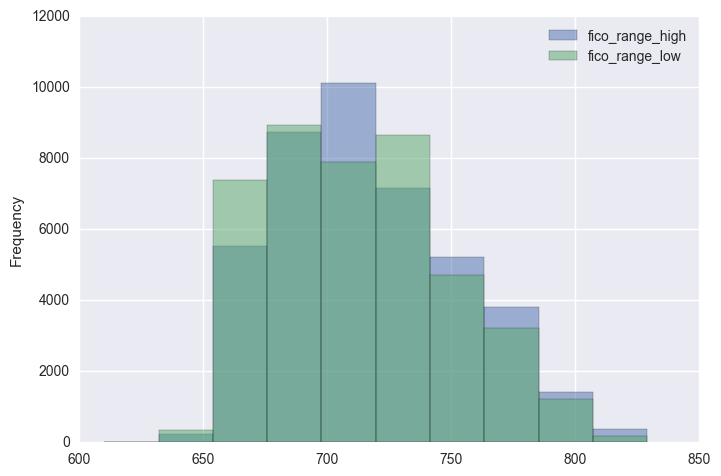

In [18]:
# Investigating FICO score columns
# Consider removing most of this cell's contents

print("FICO Range Low:")
print(loans_2007['fico_range_low'].unique())

print("FICO Range High:")
print(loans_2007['fico_range_high'].unique())

fico_columns = ['fico_range_high', 'fico_range_low']
print(loans_2007.shape[0])
loans_2007.dropna(subset = fico_columns, inplace = True)
print(loans_2007.shape[0])

loans_2007[fico_columns].plot.hist(alpha = 0.5)

In [19]:
loans_2007['fico_average'] = (loans_2007['fico_range_high'] + loans_2007['fico_range_low'])/2
cols = ['fico_range_low','fico_range_high','fico_average']
loans_2007[cols].head()

fico_range_low  fico_range_high  fico_average
0           735.0            739.0         737.0
1           740.0            744.0         742.0
2           735.0            739.0         737.0
3           690.0            694.0         692.0
4           695.0            699.0         697.0

In [20]:
# drop redundant FICO related columns
fico_cols_to_drop = ['fico_range_low', 'fico_range_high', 'last_fico_range_high']
loans_2007 = loans_2007.drop(fico_cols_to_drop, axis = 1)
loans_2007.shape

(42535, 34)

By familiarizing ourselves with the columns in the dataset, we have been able to reduce the number of features we are looking at in our analyis from 56 (# of columns with >50% non-null values) to 33

In [21]:
# target column currently contains text values - these need to be converted to numerical values for modeling
# consider removing cell
loans_2007['loan_status'].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

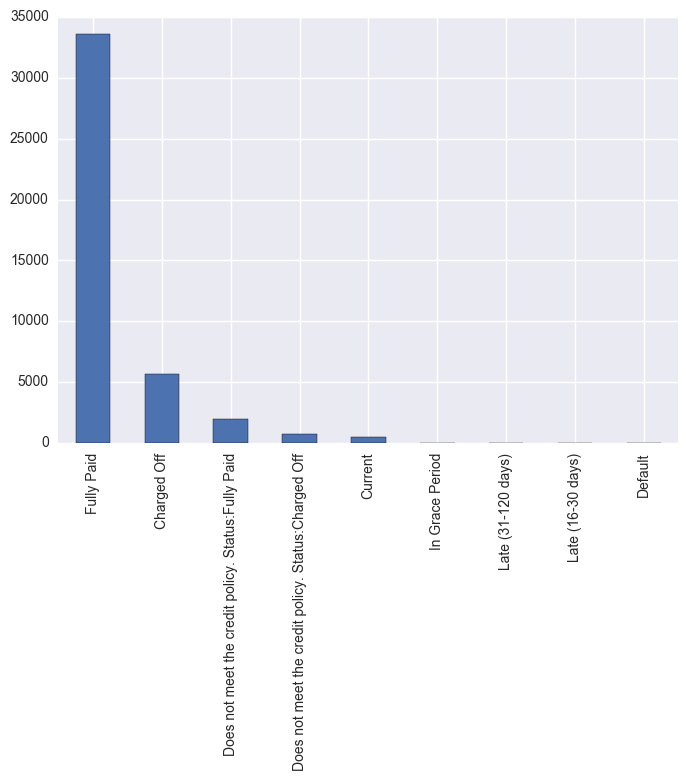

In [22]:
loans_2007['loan_status'].value_counts().plot.bar()

In [23]:
# add in loan status meanings from link:
# https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-

# interpretation of loan status terms
meaning = [
    "Loan has been fully paid off.",
    "Loan for which there is no longer a reasonable expectation of further payments",
    "While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on the marketplace.",
    "While the loan was charged off, the loan appllication today would no longer meet the credit policy and wouldn't be approved on the marketplace.",
    "Loan is up to date on current payments",
    "The loan is past due but still in grace period of 15 days",
    "Loan hasn't been paid in 31 to 120 days (late on the current payment)",
    "Loan hasn't been paid in 16 to 30 days (late on the current payment)",
    "Loan is defaulted on and no payment has been made for more than 121 days"
]

In [24]:
status, count = loans_2007['loan_status'].value_counts().index, loans_2007['loan_status'].value_counts().values

loan_status_explanation = pd.DataFrame({'Loan Status': status, 'Count': count, 'Meaning': meaning})[["Loan Status", "Count", "Meaning"]]
loan_status_explanation

Loan Status  Count  \
0                                           Fully Paid  33586   
1                                          Charged Off   5653   
2   Does not meet the credit policy. Status:Fully Paid   1988   
3  Does not meet the credit policy. Status:Charged Off    761   
4                                              Current    513   
5                                      In Grace Period     16   
6                                   Late (31-120 days)     12   
7                                    Late (16-30 days)      5   
8                                              Default      1   

                                                                                                                                           Meaning  
0                                                                                                                    Loan has been fully paid off.  
1                                                                   Loan for which there is no longer a reasonable expectation of further payments  
2      While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on the marketplace.  
3  While the loan was charged off, the loan appllication today would no longer meet the credit policy and wouldn't be approved on the marketplace.  
4                                                                                                           Loan is up to date on current payments  
5                                                                                        The loan is past due but still in grace period of 15 days  
6                                                                            Loan hasn't been paid in 31 to 120 days (late on the current payment)  
7                                                                             Loan hasn't been paid in 16 to 30 days (late on the current payment)  
8                                                                         Loan is defaulted on and no payment has been made for more than 121 days

Only the "Fully Paid" and "Charged Off" values describe the final outcome of a loan. As such, we can treat the problem as **binary classification** and remove all the loans that don't contain either "Fully Paid" or "Charged Off" as their values

In [25]:
print(loans_2007.shape)

loans_2007 = loans_2007[(loans_2007['loan_status'] == "Fully Paid") | (loans_2007['loan_status'] == "Charged Off")]
mapping_dict = {'loan_status': {"Fully Paid": 1, "Charged Off": 0}}
loans_2007 = loans_2007.replace(mapping_dict)
print(loans_2007.shape)
loans_2007.head(3)

(42535, 34)
(39239, 34)


loan_amnt        term  installment grade emp_length home_ownership  \
0     5000.0   36 months       162.87     B  10+ years           RENT   
1     2500.0   60 months        59.83     C   < 1 year           RENT   
2     2400.0   36 months        84.33     C  10+ years           RENT   

   annual_inc verification_status  loan_status pymnt_plan         purpose  \
0     24000.0            Verified            1          n     credit_card   
1     30000.0     Source Verified            0          n             car   
2     12252.0        Not Verified            1          n  small_business   

                  title addr_state    dti  delinq_2yrs earliest_cr_line  \
0              Computer         AZ  27.65          0.0         Jan-1985   
1                  bike         GA   1.00          0.0         Apr-1999   
2  real estate business         IL   8.72          0.0         Nov-2001   

   inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0             1.0       3.0      0.0    13648.0      83.7%        9.0   
1             5.0       3.0      0.0     1687.0       9.4%        4.0   
2             2.0       2.0      0.0     2956.0      98.5%       10.0   

  initial_list_status last_credit_pull_d  last_fico_range_low  \
0                   f           Sep-2016                740.0   
1                   f           Sep-2016                  0.0   
2                   f           Sep-2016                715.0   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0          1.0       INDIVIDUAL             0.0   
1                         0.0          1.0       INDIVIDUAL             0.0   
2                         0.0          1.0       INDIVIDUAL             0.0   

   chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens  \
0                       0.0          0.0                   0.0        0.0   
1                       0.0          0.0                   0.0        0.0   
2                       0.0          0.0                   0.0        0.0   

   fico_average  
0         737.0  
1         742.0  
2         737.0

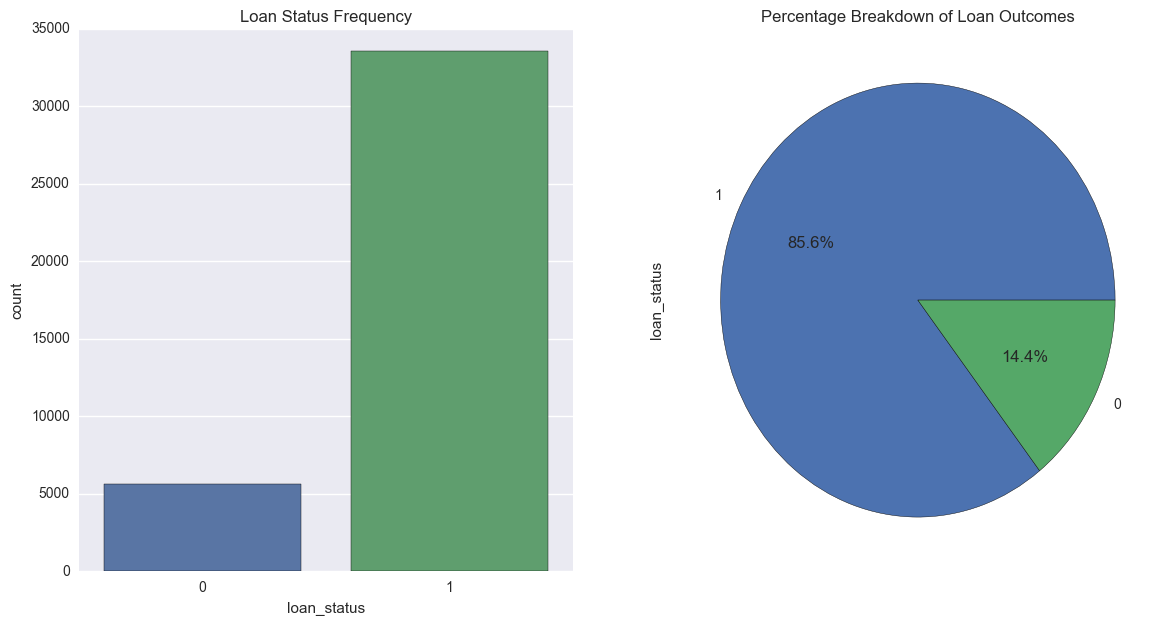

In [26]:
# visualizing loan status outcomes (target feature)
fig, axs = plt.subplots(1,2, figsize = (14, 7))
sns.countplot(x = 'loan_status', data = loans_2007, ax = axs[0])
axs[0].set_title("Loan Status Frequency")

loans_2007.loan_status.value_counts().plot(x = None, y = None, kind = 'pie', ax = axs[1], autopct = '%1.1f%%')
axs[1].set_title("Percentage Breakdown of Loan Outcomes")
plt.show()

The charts above show that ~85.6% of borrowers paid back their loans while ~14.4% defaulted. We are seeking to filter out as many of these defaulters as possible to reduce potential losses.

In [27]:
# remove columns containing only one unique value
# .nunique() = returns the number of unique values, excluding any null values

loans_2007 = loans_2007.loc[:, loans_2007.apply(pd.Series.nunique) != 1]

In [28]:
# removed 8 additional features
loans_2007.shape

(39239, 26)

In [29]:
# similarly, we can look at and consider removing columns where non-unique values occur very infrequently (less than 4 times)
for column in loans_2007.columns:
    if(len(loans_2007[column].unique()) < 4):
        print(loans_2007[column].value_counts())
        print('\n')

 36 months    29096
 60 months    10143
Name: term, dtype: int64


Not Verified       16845
Verified           12526
Source Verified     9868
Name: verification_status, dtype: int64


1    33586
0     5653
Name: loan_status, dtype: int64


n    39238
y        1
Name: pymnt_plan, dtype: int64




In [30]:
# remove pymnt_plan column from above since all but 1 are 'n'
loans_2007.drop('pymnt_plan', axis = 1, inplace = True)

In [31]:
print("We have been able to reduce the number of features in our data set to {}".format(loans_2007.shape[1]))

We have been able to reduce the number of features in our data set to 25


In [32]:
# save new cleaned up data set as a csv file
loans_2007.to_csv('filtered_loans_2007_1-30-2017.csv', index = False)

In [33]:
# PREPARE FEATURES FOR MACHINE LEARNING
# uses new csv file
filtered_loans = pd.read_csv('filtered_loans_2007_1-30-2017.csv')
print(filtered_loans.shape)
filtered_loans.head()

(39239, 25)


loan_amnt        term  installment grade emp_length home_ownership  \
0     5000.0   36 months       162.87     B  10+ years           RENT   
1     2500.0   60 months        59.83     C   < 1 year           RENT   
2     2400.0   36 months        84.33     C  10+ years           RENT   
3    10000.0   36 months       339.31     C  10+ years           RENT   
4     5000.0   36 months       156.46     A    3 years           RENT   

   annual_inc verification_status  loan_status         purpose  \
0     24000.0            Verified            1     credit_card   
1     30000.0     Source Verified            0             car   
2     12252.0        Not Verified            1  small_business   
3     49200.0     Source Verified            1           other   
4     36000.0     Source Verified            1         wedding   

                                   title addr_state    dti  delinq_2yrs  \
0                               Computer         AZ  27.65          0.0   
1                                   bike         GA   1.00          0.0   
2                   real estate business         IL   8.72          0.0   
3                               personel         CA  20.00          0.0   
4  My wedding loan I promise to pay back         AZ  11.20          0.0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0         Jan-1985             1.0       3.0      0.0    13648.0      83.7%   
1         Apr-1999             5.0       3.0      0.0     1687.0       9.4%   
2         Nov-2001             2.0       2.0      0.0     2956.0      98.5%   
3         Feb-1996             1.0      10.0      0.0     5598.0        21%   
4         Nov-2004             3.0       9.0      0.0     7963.0      28.3%   

   total_acc last_credit_pull_d  last_fico_range_low  pub_rec_bankruptcies  \
0        9.0           Sep-2016                740.0                   0.0   
1        4.0           Sep-2016                  0.0                   0.0   
2       10.0           Sep-2016                715.0                   0.0   
3       37.0           Apr-2016                600.0                   0.0   
4       12.0           Jan-2016                675.0                   0.0   

   fico_average  
0         737.0  
1         742.0  
2         737.0  
3         692.0  
4         732.0

In [34]:
# dealing with null values
# count of null values in each column
null_counts = filtered_loans.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                 0
term                      0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
title                    10
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
last_credit_pull_d        2
last_fico_range_low       0
pub_rec_bankruptcies    697
fico_average              0
dtype: int64


In [35]:
# not very useful for columns with low count of null values given number of rows
# sns.heatmap(filtered_loans.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [36]:
# drop 'pub_rec_bankruptcies' due to high count of null values (>1%)
filtered_loans.drop('pub_rec_bankruptcies', axis = 1, inplace = True)

# for remaining features (where count of null values > 1%, drop rows where null values occur)
filtered_loans.dropna(inplace = True)

In [37]:
filtered_loans.shape

(39177, 24)

In [38]:
# need to convert object data types to numerical values
print("Data types with their frequencies\n{}".format(filtered_loans.dtypes.value_counts()))

Data types with their frequencies
float64    12
object     11
int64       1
dtype: int64


In [39]:
# display a sample row for each of the columns of object type
object_columns_df = filtered_loans.select_dtypes(include = ['object'])
print(object_columns_df.iloc[0])

term                     36 months
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Sep-2016
Name: 0, dtype: object


In [40]:
filtered_loans['revol_util'] = filtered_loans['revol_util'].str.rstrip('%').astype('float')

In [41]:
cols = ['home_ownership', 'grade', 'verification_status', 'emp_length', 'term', 'addr_state']
for col in cols:
    print(col, ':')
    print("\n")
    print(object_columns_df[col].value_counts(), '\n')

('home_ownership', ':')


(RENT        18677
MORTGAGE    17381
OWN          3020
OTHER          96
NONE            3
Name: home_ownership, dtype: int64, '\n')
('grade', ':')


(B    11873
A    10062
C     7970
D     5194
E     2760
F     1009
G      309
Name: grade, dtype: int64, '\n')
('verification_status', ':')


(Not Verified       16809
Verified           12515
Source Verified     9853
Name: verification_status, dtype: int64, '\n')
('emp_length', ':')


(10+ years    8715
< 1 year     4542
2 years      4344
3 years      4050
4 years      3385
5 years      3243
1 year       3207
6 years      2198
7 years      1738
8 years      1457
9 years      1245
n/a          1053
Name: emp_length, dtype: int64, '\n')
('term', ':')


( 36 months    29041
 60 months    10136
Name: term, dtype: int64, '\n')
('addr_state', ':')


(CA    7019
NY    3757
FL    2831
TX    2693
NJ    1825
IL    1513
PA    1493
VA    1388
GA    1381
MA    1322
OH    1197
MD    1039
AZ     863
WA     830
CO     777
NC   

Most of the columns above contain categorical values and we can therefore encode them as dummy variables and keep them

The ```addr_state``` column, however, contains too many unique values, so we will drop it (for ML - may use for visualization part)

In [42]:
# take a closer look at purpose and title columns as they appear to provide similar information
for name in ['purpose', 'title']:
    print("Unique values in column: {}\n".format(name))
    print(filtered_loans[name].value_counts(), '\n')

Unique values in column: purpose

(debt_consolidation    18355
credit_card            5073
other                  3921
home_improvement       2944
major_purchase         2178
small_business         1792
car                    1534
wedding                 940
medical                 688
moving                  580
vacation                377
house                   372
educational             320
renewable_energy        103
Name: purpose, dtype: int64, '\n')
Unique values in column: title

(Debt Consolidation                         2142
Debt Consolidation Loan                    1670
Personal Loan                               650
Consolidation                               501
debt consolidation                          495
Credit Card Consolidation                   354
Home Improvement                            350
Debt consolidation                          331
Small Business Loan                         317
Credit Card Loan                            310
Personal                 

In [43]:
# drop title column as it contains fewer discrete vlaues and is cleaner
filtered_loans.drop('title', axis = 1, inplace = True)
filtered_loans.shape

(39177, 23)

In [44]:
# converts 'emp_length' and 'grade' columns to numerical values
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    },
    "grade": {
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

filtered_loans = filtered_loans.replace(mapping_dict)
filtered_loans[['emp_length', 'grade']].head()

emp_length  grade
0          10      2
1           0      3
2          10      3
3          10      3
4           3      1

In [45]:
# remaining object columns
object_columns_df = filtered_loans.select_dtypes(include = ['object'])
print(object_columns_df.iloc[0])

term                     36 months
home_ownership                RENT
verification_status       Verified
purpose                credit_card
addr_state                      AZ
earliest_cr_line          Jan-1985
last_credit_pull_d        Sep-2016
Name: 0, dtype: object


In [46]:
# drop these additional columns
obj_cols_to_drop = ['addr_state','earliest_cr_line','last_credit_pull_d']
filtered_loans = filtered_loans.drop(obj_cols_to_drop, axis = 1)

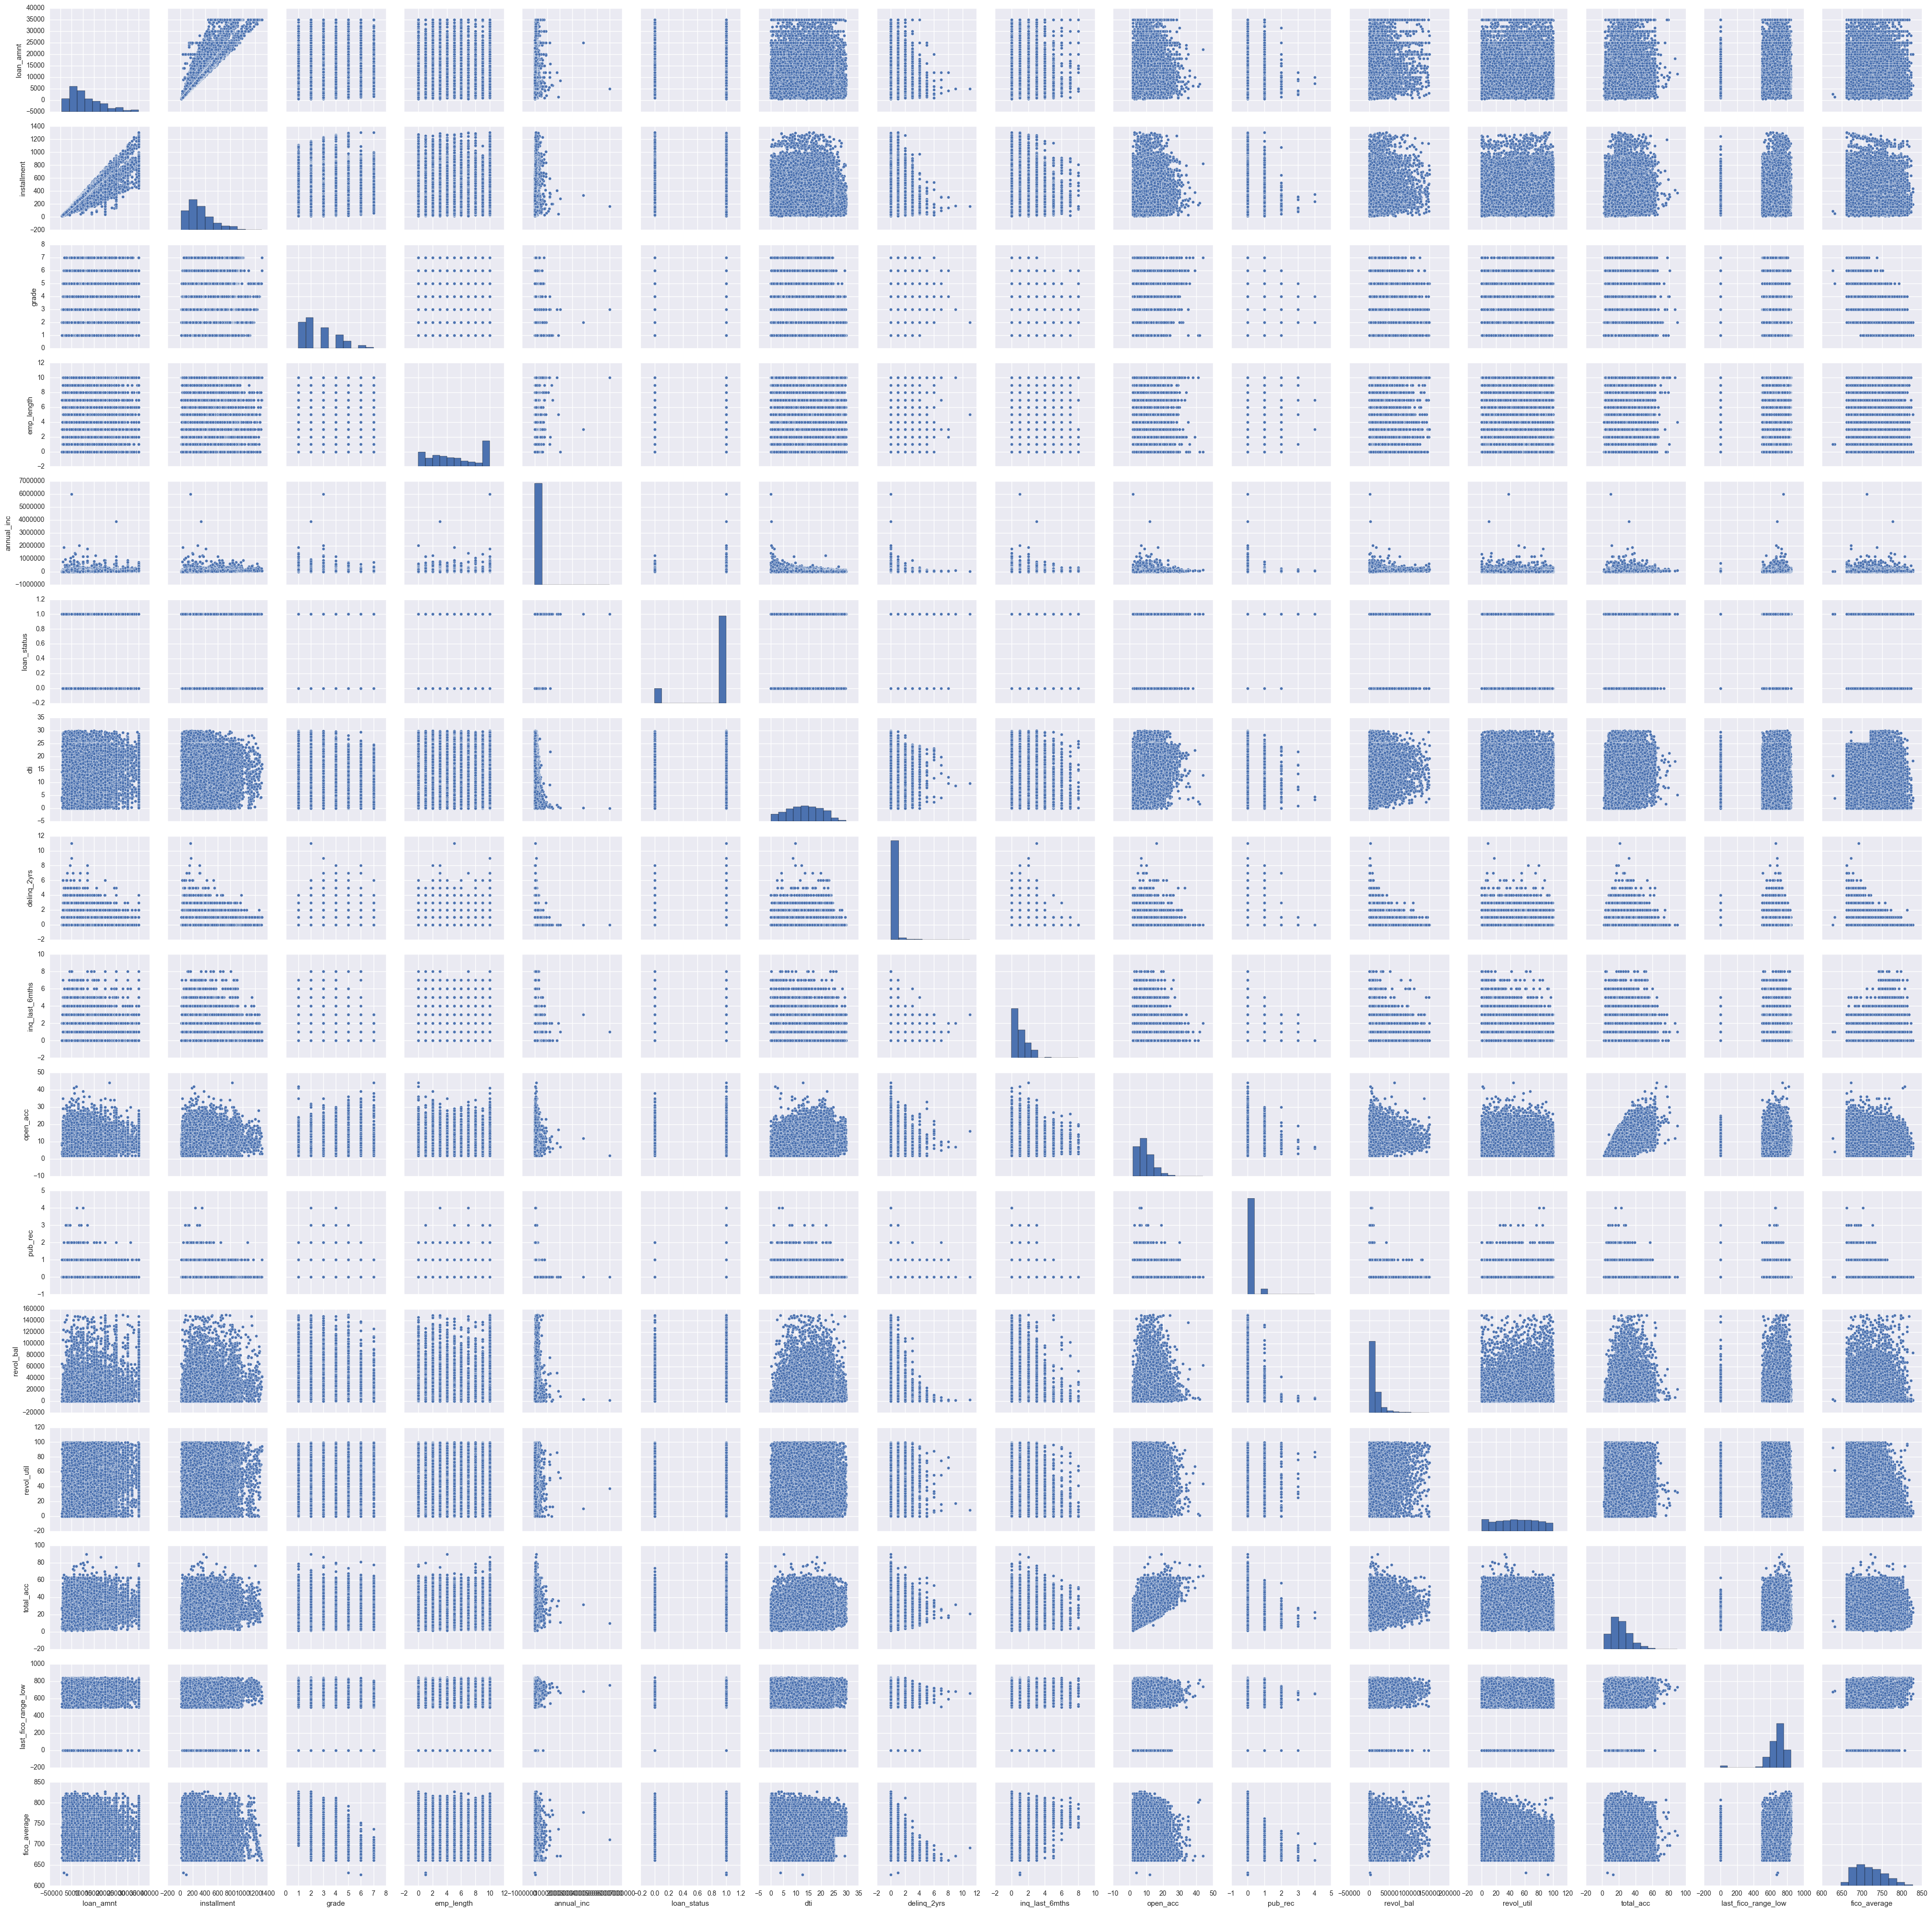

In [47]:
sns.pairplot(filtered_loans)

In [48]:
# dummify nominal values
nominal_columns = ['home_ownership', 'verification_status', 'purpose', 'term']
dummy_df = pd.get_dummies(filtered_loans[nominal_columns])

filtered_loans = pd.concat([filtered_loans, dummy_df], axis = 1)
filtered_loans = filtered_loans.drop(nominal_columns, axis = 1)
filtered_loans.head(3)

loan_amnt  installment  grade  emp_length  annual_inc  loan_status    dti  \
0     5000.0       162.87      2          10     24000.0            1  27.65   
1     2500.0        59.83      3           0     30000.0            0   1.00   
2     2400.0        84.33      3          10     12252.0            1   8.72   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0          0.0             1.0       3.0      0.0    13648.0        83.7   
1          0.0             5.0       3.0      0.0     1687.0         9.4   
2          0.0             2.0       2.0      0.0     2956.0        98.5   

   total_acc  last_fico_range_low  fico_average  home_ownership_MORTGAGE  \
0        9.0                740.0         737.0                      0.0   
1        4.0                  0.0         742.0                      0.0   
2       10.0                715.0         737.0                      0.0   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
0                  0.0                   0.0                 0.0   
1                  0.0                   0.0                 0.0   
2                  0.0                   0.0                 0.0   

   home_ownership_RENT  verification_status_Not Verified  \
0                  1.0                               0.0   
1                  1.0                               0.0   
2                  1.0                               1.0   

   verification_status_Source Verified  verification_status_Verified  \
0                                  0.0                           1.0   
1                                  1.0                           0.0   
2                                  0.0                           0.0   

   purpose_car  purpose_credit_card  purpose_debt_consolidation  \
0          0.0                  1.0                         0.0   
1          1.0                  0.0                         0.0   
2          0.0                  0.0                         0.0   

   purpose_educational  purpose_home_improvement  purpose_house  \
0                  0.0                       0.0            0.0   
1                  0.0                       0.0            0.0   
2                  0.0                       0.0            0.0   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                     0.0              0.0             0.0            0.0   
1                     0.0              0.0             0.0            0.0   
2                     0.0              0.0             0.0            0.0   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                       0.0                     0.0               0.0   
1                       0.0                     0.0               0.0   
2                       0.0                     1.0               0.0   

   purpose_wedding  term_ 36 months  term_ 60 months  
0              0.0              1.0              0.0  
1              0.0              0.0              1.0  
2              0.0              1.0              0.0

In [49]:
# here are the columns we have left to work with
filtered_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39177 entries, 0 to 39238
Data columns (total 40 columns):
loan_amnt                              39177 non-null float64
installment                            39177 non-null float64
grade                                  39177 non-null int64
emp_length                             39177 non-null int64
annual_inc                             39177 non-null float64
loan_status                            39177 non-null int64
dti                                    39177 non-null float64
delinq_2yrs                            39177 non-null float64
inq_last_6mths                         39177 non-null float64
open_acc                               39177 non-null float64
pub_rec                                39177 non-null float64
revol_bal                              39177 non-null float64
revol_util                             39177 non-null float64
total_acc                              39177 non-null float64
last_fico_range_low          

In [50]:
filtered_loans.shape

(39177, 40)

In [51]:
# resave output of data pre-processing to CSV
filtered_loans.to_csv('cleaned_loans_2007_1-30-2017.csv', index = False)

In [52]:
# NEXT STEPS:
    # look at Decision Tree / Random Forest models built as part of Udemy course for inspiration
    # look at accuracy scores and attempt to beat 84%

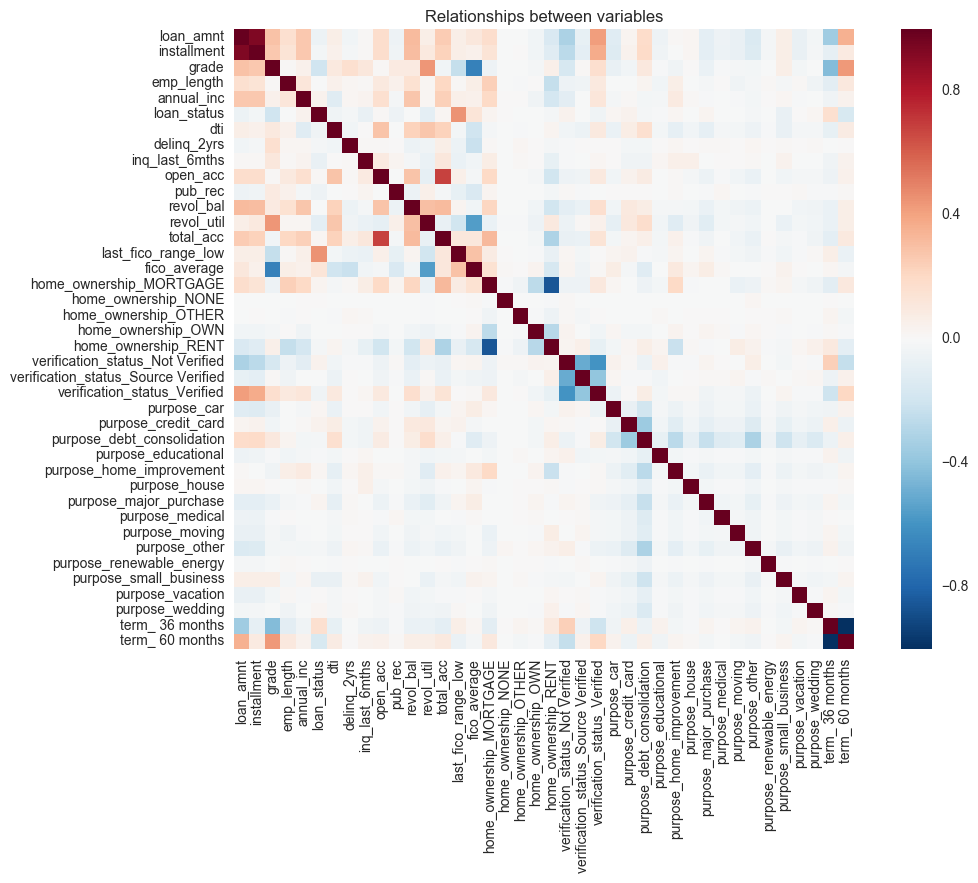

In [53]:
# Potentially useful snippet from project 5
    # only useful for less features
# snippet from project 5

correlation = filtered_loans.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, vmax=1, square=True)
plt.title("Relationships between variables")
plt.show()

In [54]:
new_section("Modeling")

In [55]:
# train test split
from sklearn.model_selection import train_test_split
X = filtered_loans.drop('loan_status', axis = 1)
y = filtered_loans['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [56]:
filtered_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39177 entries, 0 to 39238
Data columns (total 40 columns):
loan_amnt                              39177 non-null float64
installment                            39177 non-null float64
grade                                  39177 non-null int64
emp_length                             39177 non-null int64
annual_inc                             39177 non-null float64
loan_status                            39177 non-null int64
dti                                    39177 non-null float64
delinq_2yrs                            39177 non-null float64
inq_last_6mths                         39177 non-null float64
open_acc                               39177 non-null float64
pub_rec                                39177 non-null float64
revol_bal                              39177 non-null float64
revol_util                             39177 non-null float64
total_acc                              39177 non-null float64
last_fico_range_low          

In [57]:
# training a decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [58]:
# predictions and evaluation of decision tree
predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
            
print("Classification Report:")
print(classification_report(y_test, predictions))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predictions))

Classification Report:
             precision    recall  f1-score   support

          0       0.65      0.37      0.47      1661
          1       0.90      0.97      0.93     10093

avg / total       0.87      0.88      0.87     11754


Confusion Matrix:
[[ 614 1047]
 [ 335 9758]]


In [59]:
# FROM TA REVIEW (REBECCA)
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ["Default","Fully Paid"]):
    
    plt.figure(figsize=(12,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, fontsize = 12)
    plt.yticks(tick_marks, labels, rotation = 90, fontsize = 12)
        
    plt.title(title, fontsize = 24)
    plt.ylabel('True label', fontsize = 18)
    plt.xlabel('Predicted label', fontsize = 18)
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, \
                                foreground='black'), path_effects.Normal()])
    return

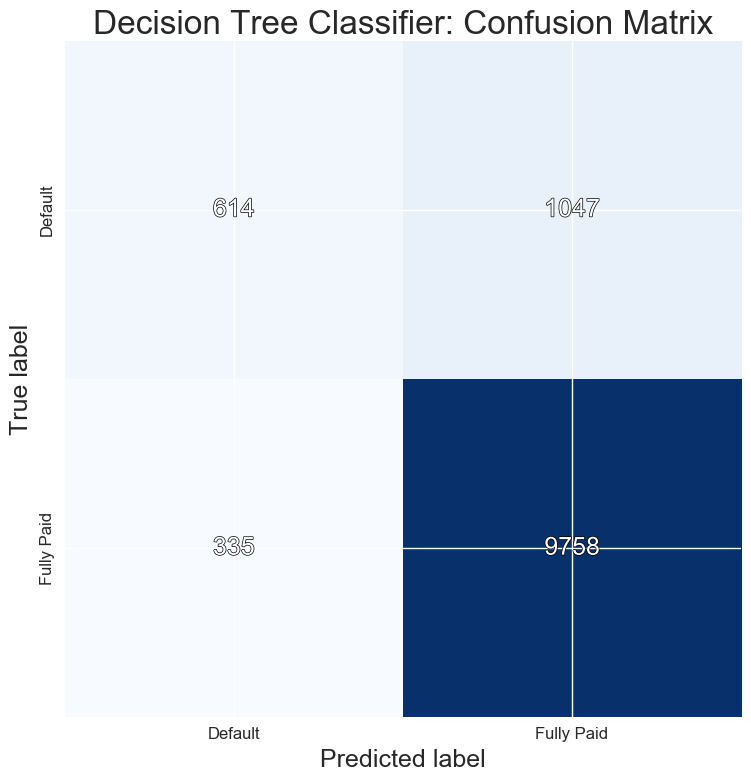

In [60]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, title='Decision Tree Classifier: Confusion Matrix')

In [61]:
# format as percentage
accuracy_score(y_test, predictions)

0.88242300493449044

In [62]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

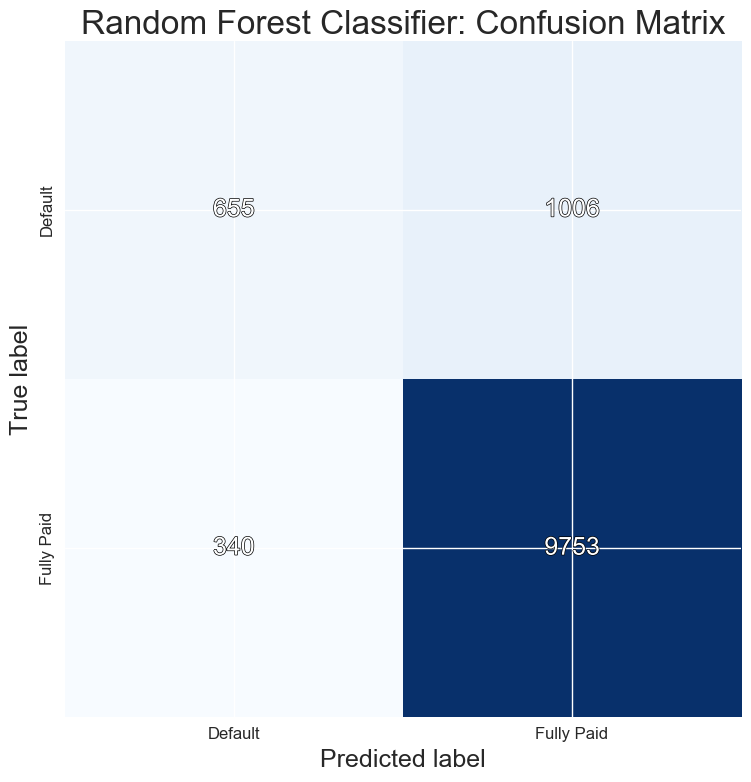

In [63]:
rfc_pred = rfc.predict(X_test)
rf_cm = confusion_matrix(y_test, rfc_pred)
plot_confusion_matrix(rf_cm, title='Random Forest Classifier: Confusion Matrix')

[[ 655 1006]
 [ 340 9753]]


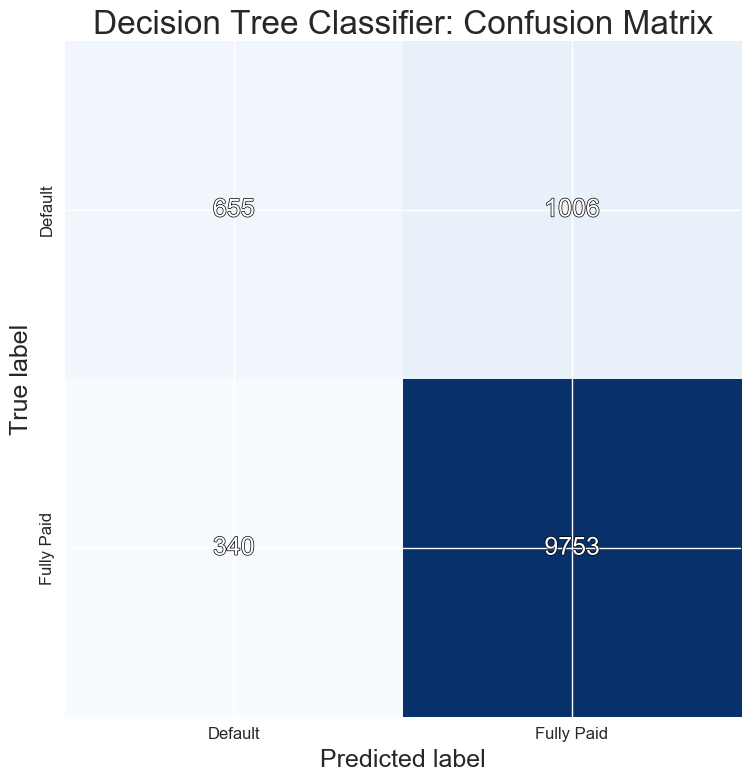

In [64]:
print(confusion_matrix(y_test, rfc_pred))
plot_confusion_matrix(rf_cm, title='Decision Tree Classifier: Confusion Matrix')

In [65]:
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          0       0.66      0.39      0.49      1661
          1       0.91      0.97      0.94     10093

avg / total       0.87      0.89      0.87     11754



Precision and recall documentation [link](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [66]:
# TO-DO: format as percentage
accuracy_score(y_test, rfc_pred)

0.88548579207078437

In [67]:
# grid search over random forest and tune some of the hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth':[3,5,7,10], 'max_features': [0.3, 0.5, 0.7], 'n_estimators': [3, 10, 30, 100]}
]

grid_search = GridSearchCV(rfc, param_grid)
grid_search.fit(X, y)
grid_search.best_params_

{'max_depth': 7, 'max_features': 0.7, 'n_estimators': 100}

In [68]:
# best performing hyperparameters
print(grid_search.best_params_)

# score for best parameters
print(grid_search.best_score_)

# fitted model
grid_search.best_estimator_

{'max_features': 0.7, 'n_estimators': 100, 'max_depth': 7}
0.883809377951


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=0.7, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [69]:
# prediction of an individual loan outcome
grid_search.best_estimator_.predict(X.iloc[1,:])

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0])

### Ideas for Further Analysis
[TBU]